In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Renaming the Columns

In [5]:
data1 = data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTG'},axis=1)

In [6]:
data1

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
#No duplicates
data1[data1.duplicated()]            

,RDS,ADMS,MKTG,State,Profit


In [8]:
data1.describe()

,RDS,ADMS,MKTG,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Correlation Analysis

In [9]:
data1.corr()

,RDS,ADMS,MKTG,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTG,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Format the plot background and scatter plots for all the variables

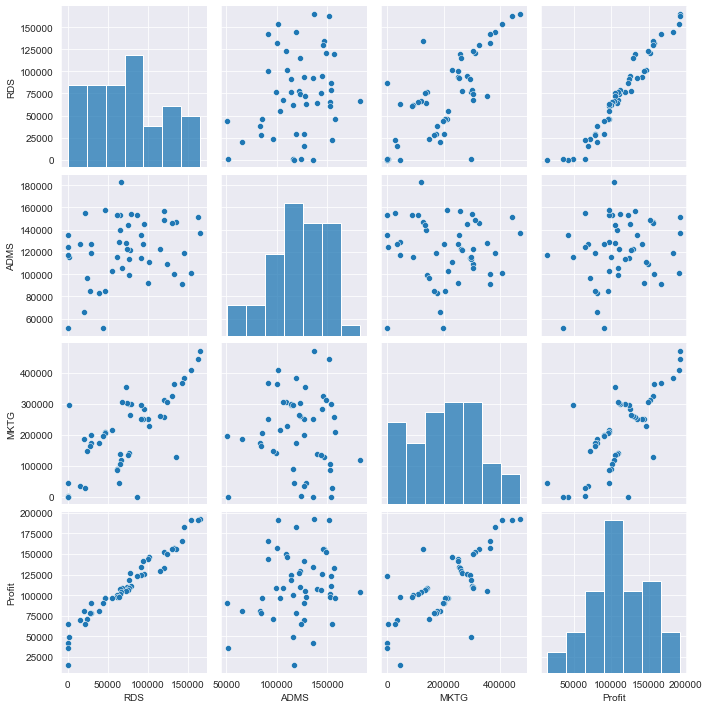

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

## Preparing a model

## Build model

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+ADMS+MKTG',data=data1).fit()

## Coefficients

In [12]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTG             0.027228
dtype: float64

## t and p-Values

In [13]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTG          1.655077
dtype: float64 
 Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTG         0.10472
dtype: float64


## R squared values

In [14]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Build simple linear regression and multi linear regression for insignificant variables 'ADMS' & 'MKTG'

In [15]:
slr_A=smf.ols('Profit~ADMS',data = data1).fit()  

In [16]:
#t and p-Values
print(slr_A.tvalues, '\n',slr_A.pvalues) 

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [17]:
slr_M=smf.ols('Profit~MKTG',data = data1).fit()  
#t and p-Values
print(slr_M.tvalues, '\n',slr_M.pvalues)

Intercept    7.808356
MKTG         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTG         4.381073e-10
dtype: float64


In [18]:
mlr_AM=smf.ols('Profit~ADMS+MKTG',data = data1).fit()  
#t and p-Values
print(mlr_AM.tvalues, '\n',mlr_AM.pvalues) 

Intercept    1.142741
ADMS         2.467779
MKTG         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMS         1.729198e-02
MKTG         9.727245e-11
dtype: float64


## Calculating VIF

In [19]:
rsq_R=smf.ols('RDS~ADMS+MKTG',data=data1).fit().rsquared
vif_R=1/(1-rsq_R)

rsq_A=smf.ols('ADMS~RDS+MKTG',data=data1).fit().rsquared
vif_A=1/(1-rsq_A)

rsq_M=smf.ols('MKTG~ADMS+RDS',data=data1).fit().rsquared
vif_M=1/(1-rsq_M)

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADMS','MKTG'],'VIF':[vif_R,vif_A,vif_M]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTG,2.326773


- None of the VIF>20, No collinearity, consider all variables in Regression Equation   
- Residual Analysis
- Test for Normality of Residuals (Q-Q Plot)

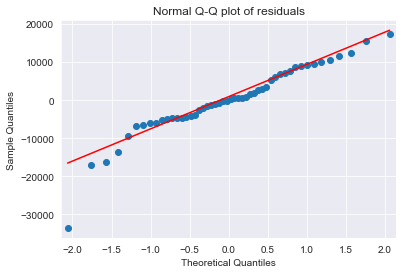

In [20]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-30000))  

[array([49], dtype=int64)]

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

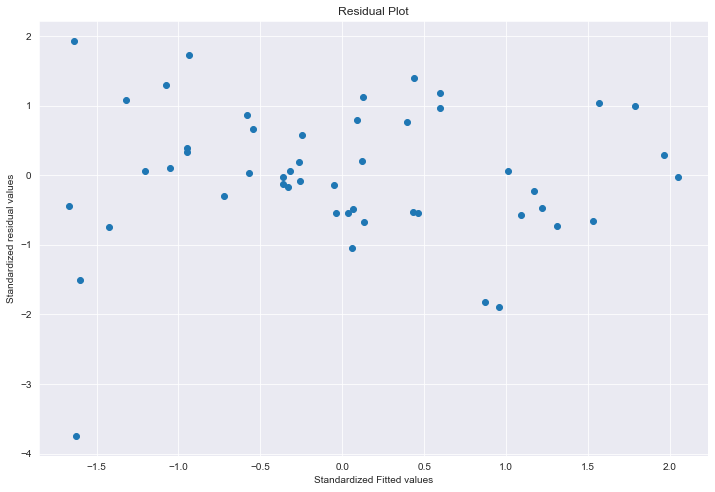

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


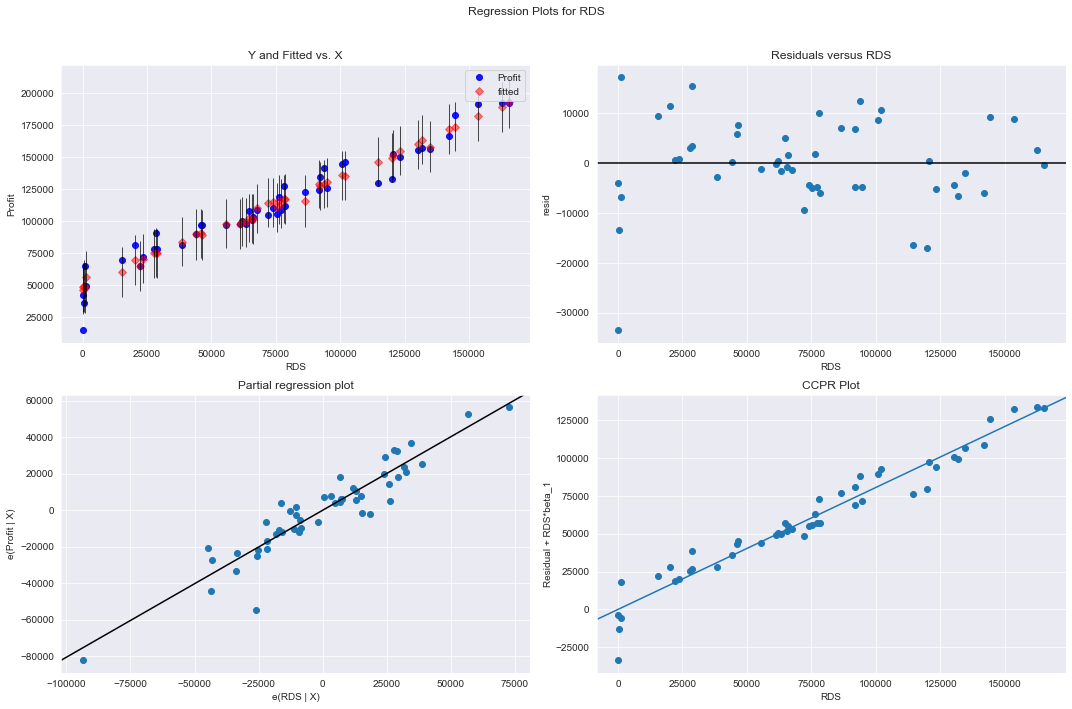

In [24]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


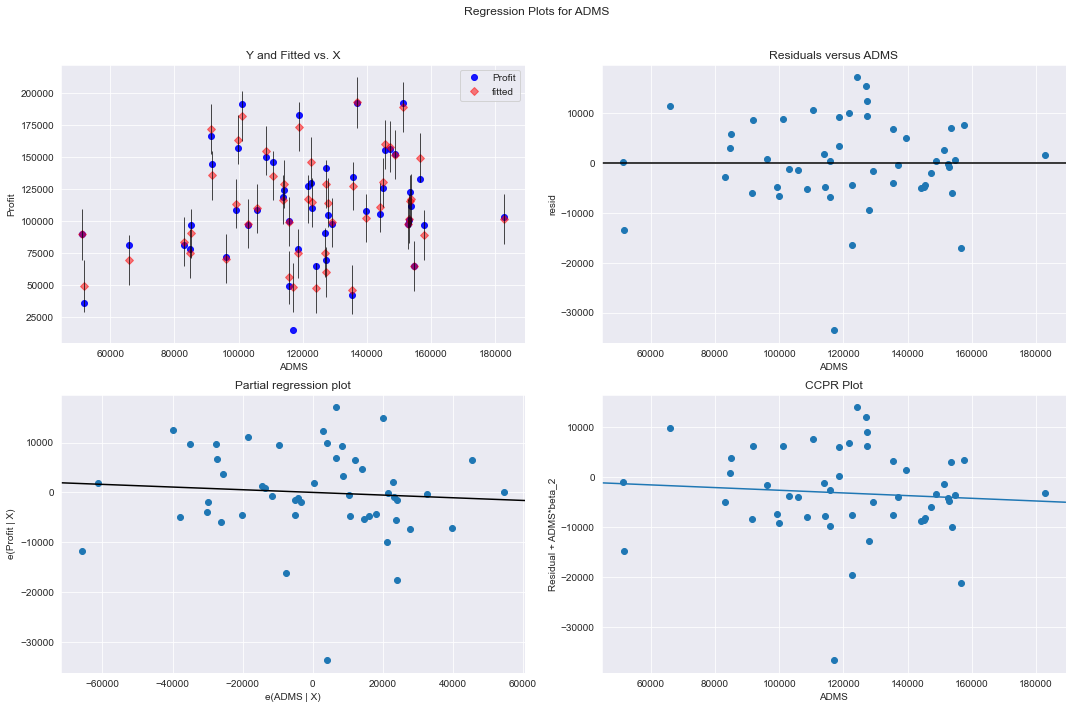

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

eval_env: 1


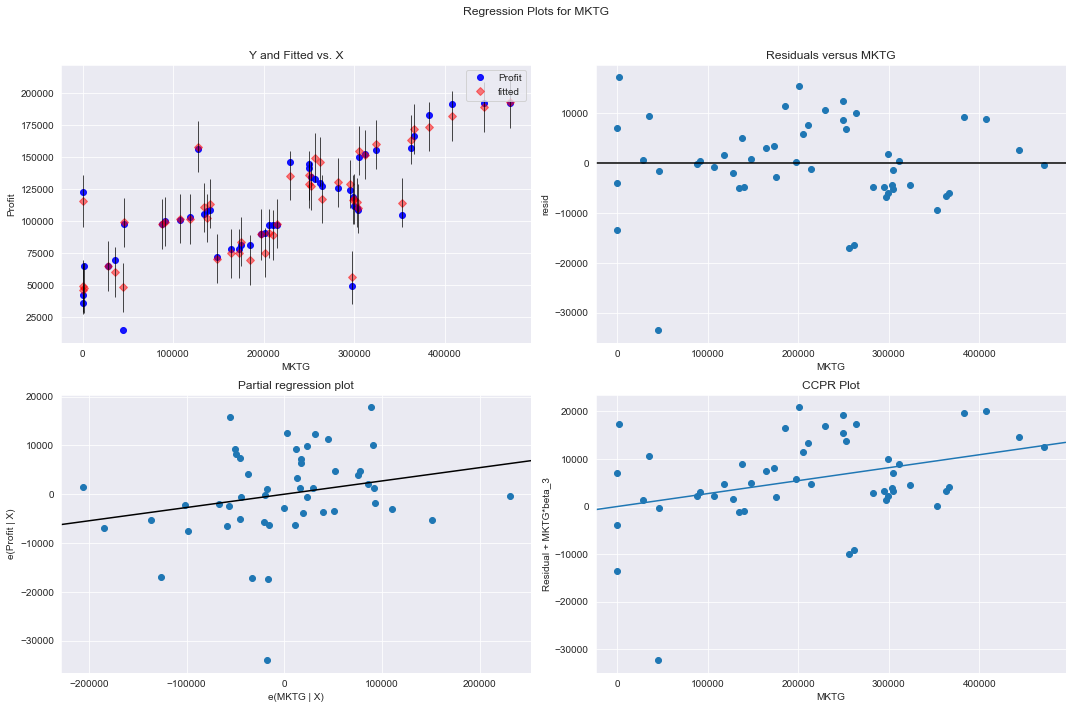

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "MKTG", fig=fig)
plt.show()

## Model Deletion Diagnostics (Detecting Influencers/Outliers)                                       Cook’s Distance and Leverage Value

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

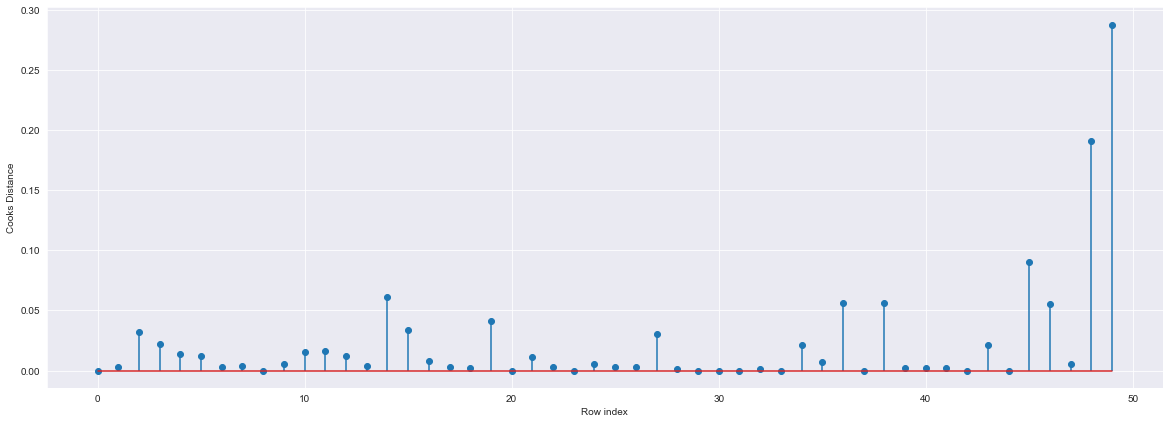

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [30]:
data1.shape

(50, 5)

In [31]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

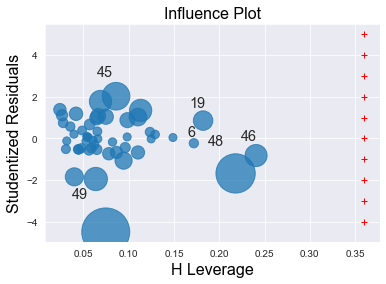

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-4,6)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [33]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTG,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [34]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[[49]],axis=0).reset_index()
data2

,index,RDS,ADMS,MKTG,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [36]:
data2

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Final Model

In [37]:
if np.max(c)>0.5:
    model=smf.ols('Profit~RDS+ADMS+MKTG',data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
elif np.max(c)<1:
    final_model=smf.ols('Profit~RDS+ADMS+MKTG',data=data2).fit()
    final_model.rsquared,final_model.aic
    print('Model accuracy is improved to:',final_model.rsquared)

Model accuracy is improved to: 0.9613162435129847


In [38]:
data2

,RDS,ADMS,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Check the accuracy of the model

In [39]:
final_model= smf.ols('Profit~RDS+ADMS+MKTG',data = data2).fit()

In [40]:
(final_model.rsquared,final_model.aic)

(0.9613162435129847, 1020.5652974526367)

## Model Predictions

In [41]:
predict_y=final_model.predict(data2)
predict_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [42]:
d2 = {'Prepared_Models':['Model','Final Model'],'R_Squared':[model.rsquared,final_model.rsquared]}

In [43]:
pd.DataFrame(d2)

,Prepared_Models,R_Squared
0,Model,0.950746
1,Final Model,0.961316
